In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization
import matplotlib.pyplot as plt
import seaborn as sns    #是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，在大多数情况下使用seaborn就能做出很具有吸引力的图
%matplotlib inline

from sklearn.model_selection import train_test_split # utils
from sklearn.metrics import mean_absolute_error # eval metric
from sklearn.metrics import explained_variance_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
# data processing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet # machine learning

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

# Reading Data

In [2]:
df = pd.read_csv('X_train.csv')
y = pd.read_csv('y_train.csv')['PRP']
df_test = pd.read_csv('X_test.csv')
df.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
0,125,256,6000,256,16,128
1,29,8000,32000,32,8,32
2,29,8000,32000,32,8,32
3,29,8000,32000,32,8,32
4,26,8000,32000,64,8,32


# Plot each variable x

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: T

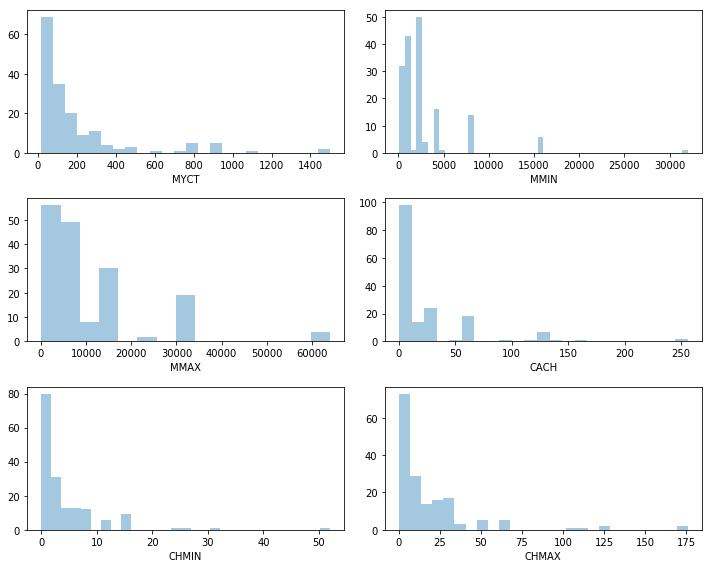

In [3]:
fig, ax = plt.subplots(3,2,figsize=(10,8))
for i,c in enumerate(df):
    sns.distplot(df[c], ax=ax[i // 2][i % 2], kde=False)
fig.tight_layout()

# Regression

# Split data with percentages

In [4]:
# split the data
X, y = df.values, y.values
X_train, X_val, y_train, y_val = train_test_split(df, y, test_size=0.2, random_state=1)
# data preprocessing using sklearn Pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, interaction_only=True)), # multiply features together
    ('scale', StandardScaler()), # scale data
])

# fit and apply transform
X_train = pipeline.fit_transform(X_train)
# transform the validation set
X_val = pipeline.transform(X_val)
print('train shape:', X_train.shape, 'validation shape:', X_val.shape)

train shape: (134, 22) validation shape: (34, 22)


# Linear regression-ElasticNet

In [5]:
s = 0
distance = 0.001
min = 100
suprem = 0
reg = ElasticNet(alpha=1)
store = reg.fit(X_train, y_train) 
for i in range(1000):
    reg = ElasticNet(alpha=s)   
    s+=distance
    a=reg.fit(X_train, y_train) # magic happens he
    y_pred = reg.predict(X_val)
    y_pred[y_pred < 0] = 0
    loss = mean_absolute_error(y_val, y_pred)
    if min >= loss:
        min = loss
        suprem = s
        store = a
print('Model MAE:', min)
print(suprem)
a = store

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Model MAE: 15.925981381339712
0.3130000000000002


In [6]:
evs = explained_variance_score(y_val, y_pred)
#Best possible score is 1.0, lower values are worse.
mse = mean_squared_error(y_val, y_pred)
#(the best value is 0.0)
mae = median_absolute_error(y_val, y_pred)
#(the best value is 0.0).
r2 = r2_score(y_val, y_pred)
#Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 
print('Model MAE:', loss)
print('Explained Variance Score:', evs)
print('Mean Squared Error:', mse)
print('Median_Absolute_Error:', mae)
print('r2_score:', r2)

Model MAE: 16.660352546671447
Explained Variance Score: 0.9125139044358148
Mean Squared Error: 600.5693455656001
Median_Absolute_Error: 12.03919303562298
r2_score: 0.912054563218904


# Regression model-ElasticNet regression

In [7]:
reg = ElasticNet(alpha=0.313)
a=reg.fit(X_train, y_train) # magic happens he
y_pred = reg.predict(X_val)
y_pred[y_pred < 0] = 0
loss = mean_absolute_error(y_val, y_pred)
print('Model MAE:', loss)

Model MAE: 15.927043086482861


# Prediction-ElasticNet regression 

In [8]:
# refit and predict submission data
X_train = pipeline.fit_transform(X)
X_test = pipeline.transform(df_test.values)
reg.fit(X_train, y)
y_pred = reg.predict(X_test)
y_pred[y_pred < 0] = 0
df_sub = pd.DataFrame({'Id': np.arange(y_pred.size), 'PRP': y_pred})
df_sub.to_csv('submission_Elastic Net regression.csv', index=False)